In [1]:
import ROOT
from IPython.display import  Audio
sound_file= 'sounds/dscybsit.wav'

Welcome to JupyROOT 6.16/00


In [2]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/jpsi_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 2.95, 3.25)
data = ROOT.RooDataSet("data", "", file.Jpsi, ROOT.RooArgSet(mass))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [3]:
#Signal PDFs

## Signal PDF: Crystal ball and gaussian

frac_gauss = ROOT.RooRealVar("frac_gauss","", 0.2, 0.0, 1.0)
mean = ROOT.RooRealVar("mean", "", 3.09, 2.95, 3.25)
sigma_gauss = ROOT.RooRealVar("sigma gauss", "", 0.03, 0.000001, 1)

yield_cb = ROOT.RooRealVar("yield_cb","", 0.2, 0.0, 1.0)
sigma_cb = ROOT.RooRealVar("sigma cb", "", 0.03, 0.000001, 1)

alpha = ROOT.RooRealVar("alpha", "", 1.4, 0, 10)

n = ROOT.RooRealVar("n", "", 99, 0, 100)
n.setConstant(True)

signal1 = ROOT.RooGaussian("gauss", "", mass, mean, sigma_gauss)
signal2 = ROOT.RooCBShape("crystal ball", "", mass, mean, sigma_cb, alpha, n)

In [4]:
# Background PDF
exp_coef = ROOT.RooRealVar("exp_coef", "", -3, -5, 5)

back_exp = ROOT.RooExponential("back_exp", "", mass, exp_coef)

In [5]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(signal1, signal2, back_exp),
                       ROOT.RooArgList(frac_gauss, yield_cb), ROOT.kTRUE)

In [6]:
result = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss,crystal ball,back_exp)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha        1.40000e+00  7.00000e-01    0.00000e+00  1.00000e+01
     2 exp_coef    -3.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     3 frac_gauss   2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     4 mean         3.09000e+00  3.00000e-02    2.95000e+00  3.25000e+00
     5 sigma cb     3.00000e-02  1.49995e-02    1.00000e-06  1.00000e+00
     6 sigma gauss   3.00000e-02  1.49995e-02    1.00000e-06  1.00000e+00
     7 yield_cb     2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss,crystal ball)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (back_exp)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file Jpsi_fit.png has been created


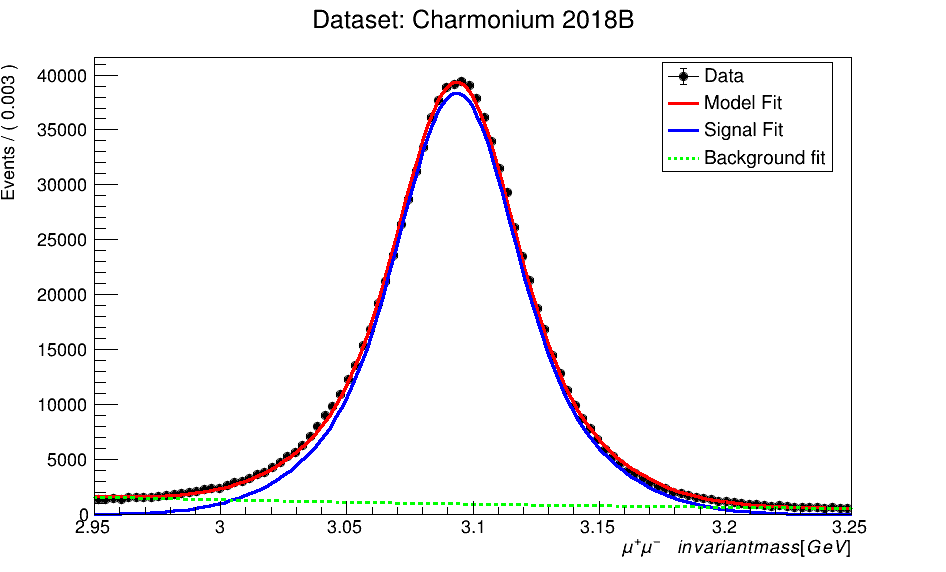

In [7]:
## Plots

# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 950, 600)

# Frame creation
frame = mass.frame(ROOT.RooFit.Title("Dataset: Charmonium 2018B"))
frame.GetXaxis().SetTitle("#\mu^+\mu^- #invariantmass[GeV]")

# Data
data.plotOn(frame, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Model
model.plotOn(frame, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

# Signal
model.plotOn(frame, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components("gauss,crystal ball"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("back_exp"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

## Legends

leg = ROOT.TLegend(0.7, 0.7, 0.88, 0.89)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame.findObject("Background"), "Background fit", "L")

frame.Draw()
leg.Draw("same")

can.Draw()

can.SaveAs("Jpsi_fit.png")

In [8]:
Audio(sound_file, autoplay=True)